# Classification - Logistic Regression

## Agenda:

- What is Logistic Regression?
- How do we train and predict using a Logistic Regression model?
- What are the different evaluation metrics for classification?
- How can we handle class imbalance?
- Hyperparameter tuning in Logistic Regression
- One-vs-All multi-class classification

In [33]:
#Import Required Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [34]:
#Read Data
data = pd.read_csv("titanic.csv")

### Data Preprocessing & Feature Engineering

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [35]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
data.shape

(891, 12)

In [53]:
# data.loc[data['Age'].isnull(),'Age'] = data['Age'].mean()

In [37]:
# lets extract the Salutations
data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') 

In [39]:
data.Initial.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Countess      1
Sir           1
Mme           1
Capt          1
Lady          1
Ms            1
Jonkheer      1
Don           1
Name: Initial, dtype: int64

In [40]:
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [41]:
pd.crosstab(data.Gender,data.Initial)

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Gender,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss/Mrs.

In [42]:
# data.loc[data['Initial']=='Don','Age']

In [63]:
# data.loc[data['Initial']=='Miss','Age'].mean()

In [44]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Mrs','Miss','Other','Mr','Mrs','Mrs','Other','Mr','Other','Mr','Mr','Mr'],inplace=True)

In [45]:
data.Initial.value_counts()

Mr        524
Miss      185
Mrs       128
Master     40
Other      14
Name: Initial, dtype: int64

In [46]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.845638
Mr        32.727160
Mrs       35.873874
Other     42.230769
Name: Age, dtype: float64

In [47]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=43

In [48]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

<b> Filling Embarked NaN </b>

In [50]:
data['Embarked'].dtypes

dtype('O')

In [51]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
data['Embarked'].fillna('S',inplace=True)

In [53]:
data.Embarked.isnull().sum()

0

<b> Family_Size and Alone </b>

At this point, we can create new features called "Family_size" and "Alone" and analyse them. Family_size is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate has anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

In [54]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

In [55]:
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,1


### Encoding categorical variables

In [56]:
data['Gender'].replace(['male','female'],[0,1],inplace=True)

In [57]:
# dummy encoding 
embarked_dummies = pd.get_dummies(data['Embarked'],prefix='Embarked').iloc[:,1:]
data1 = pd.concat([data,embarked_dummies],axis=1)
data1.drop('Embarked',axis=1,inplace=True)

# encoding in dummy variable
titles_dummies = pd.get_dummies(data1['Initial'],prefix='Initial').iloc[:,1:]
data2 = pd.concat([data1,titles_dummies],axis=1)
# removing the title variable
data2.drop('Initial',axis=1,inplace=True)

<b> Dropping UnNeeded Features</b>

<b>Name</b> We don't need name feature as it cannot be converted into any categorical value.

<b>Ticket</b>--> It is any random string that cannot be categorised.

<b>Fare</b>--> We have the Fare_cat feature, so unneeded

<b>Cabin</b>--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

<b>Fare_Range</b>--> We have the fare_cat feature.

<b>PassengerId</b>--> Cannot be categorised.

<b>SibSp, Parch</b>--> Already been captured in Family_size

In [58]:
data2.drop(['Name','Ticket','Cabin','PassengerId','SibSp','Parch'],axis=1,inplace=True)

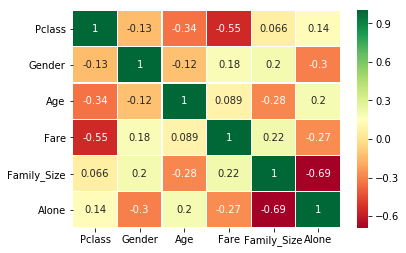

In [22]:
sns.heatmap(data2.iloc[:,1:7].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)

# Predictive Modeling

In [59]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [60]:
train,test=train_test_split(data2,test_size=0.3,random_state=1,stratify=data2['Survived'])

In [61]:
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]

In [62]:
X=data2[data2.columns[1:]]
Y=data2['Survived']

### Logistic Regression

In [63]:
model = LogisticRegression(random_state=0) # class_weight, penalty
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The Accuracy of the Logistic Regression on Train is ',metrics.accuracy_score(model.predict(train_X),train_Y))
print('The Accuracy of the Logistic Regression on Test is',metrics.accuracy_score(prediction,test_Y))

The Accuracy of the Logistic Regression on Train is  0.8234349919743178
The Accuracy of the Logistic Regression on Test is 0.8208955223880597


The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over??. The answer is <b> No </b> , because we can't determine which all instances the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as <b>model variance.</b>

To overcome this and get a generalized model,we use <b>Cross Validation.</b>

# Cross Validation

Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.

1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [64]:
from sklearn.model_selection import StratifiedKFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
skf = StratifiedKFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

cv_result = cross_val_score(LogisticRegression(random_state=0), X, Y, cv = skf,scoring = "accuracy")

print("CV Mean accuracy: {}".format(cv_result.mean()))

CV Mean accuracy: 0.82380405175349


The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

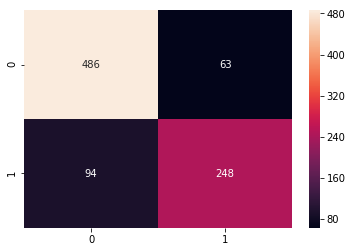

In [65]:
y_pred = cross_val_predict(LogisticRegression(random_state=0),X,Y,cv=skf)
sns.heatmap(confusion_matrix(Y,y_pred),annot=True,fmt='2.0f')

## Hyper-Parameter Tuning

The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. These are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

In [66]:
from sklearn.model_selection import GridSearchCV
hyper={'C':[0.05,0.1,0.3,0.5,0.7,0.9,1]}
gd=GridSearchCV(estimator=LogisticRegression(random_state = 0),param_grid=hyper,cv = skf)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

0.8237934904601572
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
